# HW1 - 3-bit Parity Problem
### Raz Besaleli

## Initial Imports

In [1]:
import numpy as np
from tqdm.auto import tqdm
from parity import *
from FNN import *
from visualization import *
from tabulate import tabulate

## Define Hyperparameters
This is a 3-3-1 feedforward network, meaning that the input layer has 3 neurons, the hidden layer has 3 neurons, and the output layer has 1 neuron. I set the random state to 10 for the sake of reproducibility, and the learning rate to 0.1 arbitrarily. I will first train the model on 10 epochs which will lead to a suboptimal result, and then I will train the model on the same data on 2000 epochs, leading to an optimal, intentionally overfitted result.

In [2]:
# define hyperparameters
INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM = 3, 3, 1
RANDOM_STATE = 100
LEARNING_RATE = 0.1
N_EPOCHS_SUBOPTIMAL, N_EPOCHS_OPTIMAL = 500, 2000
TRAIN_BATCH, TEST_BATCH = 3**4, 3**3

## Get Training and Testing Data
The training corpus is randomly generated with a random state for the sake of reproducibility. The batch size is set to 81.
<br><br>
The test corpus is also randomly generated with the same random state. The batch size is set to 27.

In [3]:
x_train, y_train = get3ParityDataset(batch=3**4, random_state=RANDOM_STATE)
x_test, y_test = get3ParityDataset(batch=3**3, random_state=RANDOM_STATE)

The initial parity of each 3-bit value may be expressed as the graph below:

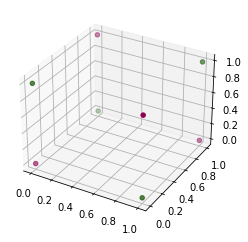

In [4]:
vecs, labs = get3ParityDataset()
# graph initial points
scatter_3d(vecs, labs=labs)

## Train the Model on Suboptimal Number of Epochs

In [5]:
model_subop = FNN(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM, random_state=RANDOM_STATE)
hidden_layers_suboptimal, loss_suboptimal = model_subop.fit(x_train, y_train, lr=LEARNING_RATE, n_epochs=N_EPOCHS_SUBOPTIMAL)

Initial Settings
--------------------  ------------------------------------
Dimensions            3-3-1
Hidden Layer Weights  [[0.54340494 0.27836939 0.42451759]
                       [0.84477613 0.00471886 0.12156912]
                       [0.67074908 0.82585276 0.13670659]]
Hidden Layer Bias     [[0.57509333 0.89132195 0.20920212]]
Output Weights        [[0.18532822]
                       [0.10837689]
                       [0.21969749]]
Output Bias           [[0.97862378]]
Activation Function   sigmoid
Random State          100
--------------------  ------------------------------------

training...


  0%|          | 0/500 [00:00<?, ?epoch/s]

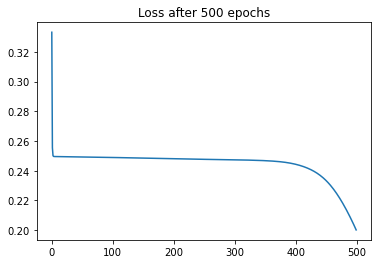

In [6]:
# plot loss
plot_2d(loss_suboptimal, title='Loss after 500 epochs')

In [7]:
model_subop.evaluate(x_test, y_test)

Metric       Score
---------  -------
accuracy     0.815
precision    0.812
recall       0.867
f1_score     0.839


In [8]:
print(model_subop)

--------------------  ---------------------------------------
Dimensions            3-3-1
Hidden Layer Weights  [[ 0.66919684 -2.82320861  0.03676234]
                       [ 1.34451009 -2.94814916 -0.56046982]
                       [-0.43880047  3.18749881  0.57755599]]
Hidden Layer Bias     [[-0.55217432  1.20724264  0.20713852]]
Output Weights        [[-1.63978063]
                       [-2.39675271]
                       [ 0.9517216 ]]
Output Bias           [[1.56443802]]
Activation Function   sigmoid
Random State          100
--------------------  ---------------------------------------


The hidden layer reactions from the suboptimal model to each 3-bit value are displayed on the scatterplot below. They seem to have no obvious structure:

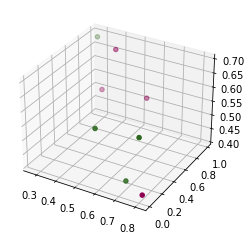

In [9]:
# graph hidden representations according to suboptimal model
subop_hidden, _ = model_subop.forward(vecs)
scatter_3d(subop_hidden, labs=labs)

## Train the Model on Optimal Number of Epochs

In [10]:
model_op = FNN(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM, random_state=RANDOM_STATE)
hidden_layers_optimal, loss_optimal = model_op.fit(x_train, y_train, lr=LEARNING_RATE, n_epochs=N_EPOCHS_OPTIMAL)

Initial Settings
--------------------  ------------------------------------
Dimensions            3-3-1
Hidden Layer Weights  [[0.54340494 0.27836939 0.42451759]
                       [0.84477613 0.00471886 0.12156912]
                       [0.67074908 0.82585276 0.13670659]]
Hidden Layer Bias     [[0.57509333 0.89132195 0.20920212]]
Output Weights        [[0.18532822]
                       [0.10837689]
                       [0.21969749]]
Output Bias           [[0.97862378]]
Activation Function   sigmoid
Random State          100
--------------------  ------------------------------------

training...


  0%|          | 0/2000 [00:00<?, ?epoch/s]

As evident by the loss function below, the model converges at around 750-1000 epochs:

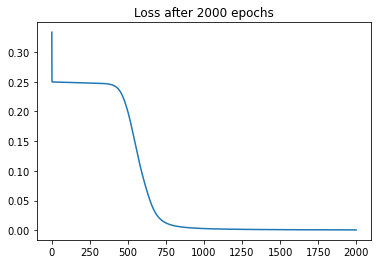

In [11]:
# plot loss
plot_2d(loss_optimal, title='Loss after 2000 epochs')

After 2000 epochs, the model accurately predicts the parity of any given 3-bit value:

In [12]:
model_op.evaluate(x_test, y_test)

Metric       Score
---------  -------
accuracy         1
precision        1
recall           1
f1_score         1


The hidden layer weights and biases also include significantly more negative values:

In [13]:
print(model_op)

--------------------  ---------------------------------------
Dimensions            3-3-1
Hidden Layer Weights  [[ 5.11712033 -6.35043514  2.11712799]
                       [ 2.87820547 -7.14528963 -2.82347298]
                       [ 2.6881594   6.70264637  5.10105223]]
Hidden Layer Bias     [[-5.32311813  3.28572757 -2.19823583]]
Output Weights        [[-8.90283508]
                       [-9.12589813]
                       [ 9.29516161]]
Output Bias           [[4.35584658]]
Activation Function   sigmoid
Random State          100
--------------------  ---------------------------------------


As evident by the scatterplot below, the hidden layer reactions for even and odd 3-bit values seem to form separate linear planes:

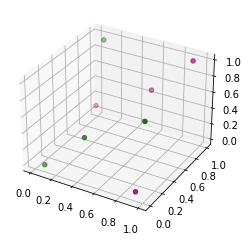

In [14]:
# graph hidden representations according to optimal model
op_hidden, _ = model_op.forward(vecs)
scatter_3d(op_hidden, labs=labs)